In [457]:
# Importando as bibliotecas necessárias para o projeto

import csv 
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy import stats

In [458]:
# Lendo e tranformando o csv em uma base de dados
life_exp = pd.read_csv("API_SP.DYN.LE00.IN_DS2_en_csv_v2_4700946.csv", sep=",",skiprows=4)
gdp = pd.read_csv("API_NY.GDP.MKTP.CD_DS2_en_csv_v2_4701247.csv", sep=",", skiprows=4)
gini = pd.read_csv("API_SI.POV.GINI_DS2_en_csv_v2_4701295.csv", sep=",", skiprows=4)
inflacao = pd.read_csv("API_FP.CPI.TOTL.ZG_DS2_en_csv_v2_4701153.csv", sep=",", skiprows=4)
saneamento = pd.read_csv("f8768fb8-96fc-4d9c-89b2-59891e4e3105_Data.csv", sep=",")

In [459]:
# Definindomos países que vamos trabalhar, suas respectivas cores e números 
paises = ["United States", "Brazil", "Russian Federation", "India", "China", "South Africa", "Uruguay", "Germany", "Denmark", "Netherlands", "Switzerland", "Italy", "France", "Sweden", "Portugal", "United Kingdom", "Belgium", "Japan", "Singapore","New Zealand"]
n_pais = [251, 29, 202, 109, 40, 263, 250, 55, 58, 176, 37, 116, 77, 223, 194, 81, 17, 119, 208, 180 ]
n_pais_saneamento = [253, 29, 202, 111, 46, 219, 255, 88, 58, 173, 235, 118, 83, 234, 196, 252, 21, 120, 212, 175]
cores = ["blue", "green", "red","orange", "red", "green", "blue", "black", "red", "orange", "pink", "blue", "blue", "yellow", "violet", "blue", "yellow", "silver", "violet", "purple" ]

In [460]:
# Filtrando os dados que desejamos utilizar no nosso trabalho
life_exp = life_exp.loc[:,["Country Name", "Country Code","2020"]]
gdp = gdp.loc[:,["Country Name", "Country Code","2018", "2019", "2020"]]
gini = gini.loc[:,["Country Name", "Country Code","2018"]]
inflacao = inflacao.loc[:,["Country Name", "Country Code","2018","2019","2020"]]
saneamento = saneamento.loc[:,["Country Name", "Country Code","2019 [YR2019]","2020 [YR2020]"]]

In [461]:
# Atribuindo o dado "Região" aos países
regioes = ["Europe","South America","Europe","Asia","Europe","Europe","Europe","Europe","Asia","Europe","Asia","Europe","Oceania","Europa", "Asia","Asia","Europe","South America","North America","Africa"]
regioes_saneamento = ["Europe", "South America", "Asia", "Europe","Europe","Europe","Asia", "Europe","Asia","Europe","Oceania","Europe","Asia","Asia","Africa","Europe","Europe","Europe","North America", "South America"]

In [462]:
# Filtrando nossas bases com base nos países que queremos trabalhar
life_exp = life_exp.loc[life_exp["Country Name"].isin(paises),:]
gdp = gdp.loc[gdp["Country Name"].isin(paises),:]
gini = gini.loc[gini["Country Name"].isin(paises),:]
inflacao = inflacao.loc[inflacao["Country Name"].isin(paises),:]
saneamento = saneamento.loc[saneamento["Country Name"].isin(paises),:]

life_exp["Region"] = regioes
gdp["Region"] = regioes
gini["Region"] = regioes
inflacao["Region"] = regioes
saneamento["Region"] = regioes_saneamento

Para ilustrar os dados referentes aos países, os gráficos abaixo foram plotados.

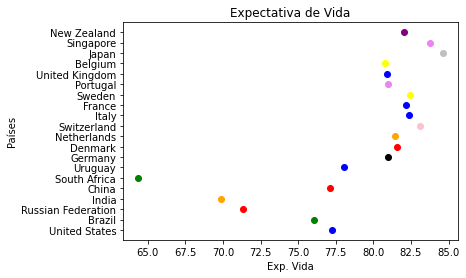

In [463]:
for i in range(len(paises)):
    y = paises[i]
    j = n_pais[i]
    x = life_exp.loc[j,"2020"]
    cor = cores[i]
    
    plt.scatter(x,y, color=cor)
    
plt.xlabel('Exp. Vida')
plt.ylabel('Países')
plt.title("Expectativa de Vida")
plt.show()

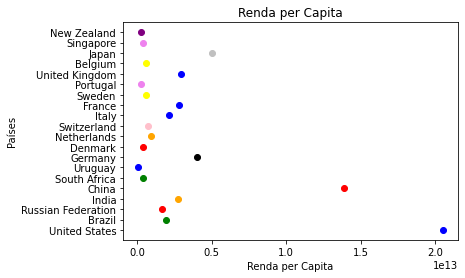

In [464]:
for i in range(len(paises)):
    y = paises[i]
    j = n_pais[i]
    x = gdp.loc[j,"2018"]
    cor = cores[i]
    
    plt.scatter(x,y, color=cor)

plt.xlabel('Renda per Capita')
plt.ylabel('Países')
plt.title("Renda per Capita")
plt.show()

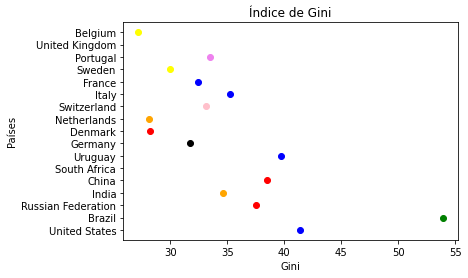

In [465]:
for i in range(len(paises)):
    y = paises[i]
    j = n_pais[i]
    x = gini.loc[j,"2018"]
    cor = cores[i]
    
    plt.scatter(x,y, color=cor)

plt.xlabel('Gini')
plt.ylabel('Países')
plt.title("Índice de Gini")
plt.show()

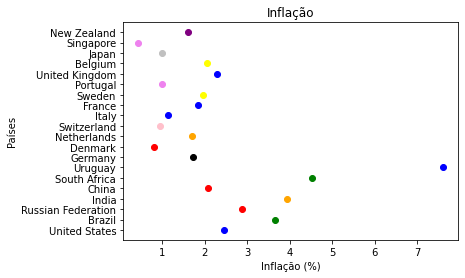

In [466]:
for i in range(len(paises)):
    y = paises[i]
    j = n_pais[i]
    x = inflacao.loc[j,"2018"]
    cor = cores[i]
    
    plt.scatter(x,y, color=cor)
    
plt.xlabel('Inflação (%)')
plt.ylabel('Países')
plt.title("Inflação");
plt.show()

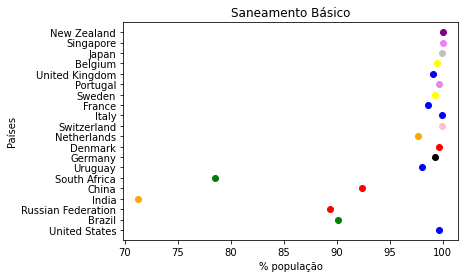

In [467]:
dict_saneamento = {}
for i in range(len(paises)):
    y = paises[i]
    j = n_pais_saneamento[i]
    x = saneamento.loc[j,"2020 [YR2020]"]
    x = float(x)
    cor = cores[i]
    
    dict_saneamento[y] = x
    plt.scatter(x,y, color=cor)
    
plt.xlabel('% população')
plt.ylabel('Países')
plt.title("Saneamento Básico")
plt.show()

In [468]:
# Removendo dados que se repetem nas bases de dados
life_exp = life_exp.drop(columns=['Country Code', 'Region'])
gdp = gdp.drop(columns=['Country Code', 'Region'])
gini = gini.drop(columns=['Country Code', 'Region'])
inflacao = inflacao.drop(columns=['Country Code', 'Region'])
saneamento = saneamento.drop(columns=['Country Code','2019 [YR2019]', 'Region'])

In [469]:
# Fundindo as bases de dados em uma base principal: "Dados"
life_exp_index = life_exp.set_index('Country Name')
gdp_index = gdp.set_index('Country Name')
gini_index = gini.set_index('Country Name')
inflacao_index = inflacao.set_index('Country Name')
saneamento_index = saneamento.set_index('Country Name')

df1 = life_exp_index.join(gdp_index, how='inner', lsuffix='life', rsuffix='gdp')
df2 = df1.join(gini_index, how='inner', lsuffix='gdp', rsuffix='gini')
df3 = df2.join(inflacao_index, how='inner', lsuffix='', rsuffix='inflacao')
df4 = df3.join(saneamento_index, how='inner', lsuffix='', rsuffix='saneamento')


In [470]:
# A base saneamento estava no formato pd.Series. Logo, foi necessário transformá-la em um DataFrame
paises_saneamento = sorted(paises)
valores_ordenados = []
for l in paises_saneamento:
    for i, k in dict_saneamento.items():
        if i == l:
            valores_ordenados.append(k)

In [471]:
# Renomeando as colunas da base e retirando valores nulos da base "Gini"
antigo = ['2020life', '2018gdp', '2019', '2020gdp', '2018gini', '2018', '2019inflacao', '2020', '2020 [YR2020]']
novo = ['exp_life', 'GDP_2018', 'GDP_2019', 'GDP_2020', 'Gini', 'infla_2018', 'infla_2019', 'infla_2020', 'saneamento']
i = 0
while i < len(antigo):
    df4 = df4.rename(columns = {antigo[i]:novo[i]})
    i += 1

dados = df4
gini_lista = [27.2, 53.9, 33.1, 38.5, 31.7, 28.2, 32.4, 0, 34.6, 35.2, 0, 28.1, 0, 33.5, 37.5, 0, 30.0, 39.7, 41.4, 0]
dados['Gini'] = gini_lista
dados['saneamento'] = valores_ordenados
dados.head(30)

,exp_life,GDP_2018,GDP_2019,GDP_2020,Gini,infla_2018,infla_2019,infla_2020,saneamento
Country Name,,,,,,,,,
Belgium,80.795122,5.433474e+11,5.353763e+11,5.216769e+11,27.2,2.053165,1.436820,0.740792,99.486156
Brazil,76.084000,1.916934e+12,1.873288e+12,1.448566e+12,53.9,3.664850,3.732976,3.211768,90.078471
Switzerland,83.100000,7.355393e+11,7.317674e+11,7.522480e+11,33.1,0.936335,0.362886,-0.725875,92.376178
China,77.097000,1.389482e+13,1.427994e+13,1.468767e+13,38.5,2.074790,2.899234,2.419422,99.597229
Germany,80.941463,3.977289e+12,3.888327e+12,3.846414e+12,31.7,1.732168,1.445667,0.506690,98.647607
Denmark,81.551220,3.568412e+11,3.475613e+11,3.560849e+11,28.2,0.813609,0.758132,0.420712,99.225619
France,82.175610,2.790957e+12,2.728870e+12,2.630318e+12,32.4,1.850815,1.108255,0.476499,71.268476
United Kingdom,80.902439,2.900791e+12,2.878674e+12,2.756900e+12,0.0,2.292840,1.738105,0.989487,99.885160
India,69.887000,2.702930e+12,2.831552e+12,2.667688e+12,34.6,3.938826,3.729506,6.623437,99.921764


In [472]:
# Aplicando a função OLS nas variáveis de interesse 
x = dados.loc[:,['GDP_2018', 'GDP_2019', 'GDP_2020', 'Gini', 'infla_2018', 'infla_2019', 'infla_2020', 'saneamento']]
y = dados['exp_life'].to_frame()
xc = sm.add_constant(x)
model = sm.OLS(y, xc)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               exp_life   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     1.175
Date:                Thu, 01 Dec 2022   Prob (F-statistic):              0.392
Time:                        23:05:01   Log-Likelihood:                -54.615
No. Observations:                  20   AIC:                             127.2
Df Residuals:                      11   BIC:                             136.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         77.4647     16.615      4.662      0.001      40.895     114.035
GDP_2018    8.301e-12   1.81e-11      0.458      0.656   -3.16e-11    4.82e-11
GDP_2019   -1.132e-11   1.66e-11     -0.683      0.509   -4.78e-11    2.52e-11
GDP_2020    3.192e-12   7.82e-12      0.408      0.691    -1.4e-11    2.04e-11
Gini           0.0398      0.079      0.504      0.624      -0.134       0.214
infla_2018    -0.3852      2.617     -0.147      0.886      -6.145       5.374
infla_2019    -1.7083      2.319     -0.737      0.477      -6.812       3.395
infla_2020     0.2131      1.500      0.142      0.890      -3.089       3.515
saneamento     0.0514      0.166      0.309      0.763      -0.315       0.417
==============================================================================
Omnibus:                        5.587   Durbin-Watson:                   1.480
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                3.317
Skew:                          -0.663   Prob(JB):                        0.190
Kurtosis:                       4.491   Cond. No.                     1.54e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+14. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [473]:
# Coeficientes extraídos da função
beta_0 = 77.4647
beta_1 = 8.301e-12
beta_2 = -1.132e-11
beta_3 = 3.192e-12
beta_4 = 0.0398
beta_5 = -0.3852
beta_6 = -1.7083
beta_7 = 0.2131
beta_8 = 0.0514

In [401]:
# Definindo o modelo e aplicando os coeficientes 
expectativa_modelo = []
for i in range(len(dados)):
    expectativa = beta_1*dados.iloc[i][1] + beta_2*dados.iloc[i][2] + beta_3*dados.iloc[i][3] + beta_4*dados.iloc[i][4] + beta_5*dados.iloc[i][5] + beta_6*dados.iloc[i][6] + beta_7*dados.iloc[i][7] + beta_8*dados.iloc[i][8] + beta_0
    expectativa_modelo.append(expectativa)
dados['previsões modelo'] = expectativa_modelo
dados.head(30)

,exp_life,GDP_2018,GDP_2019,GDP_2020,Gini,infla_2018,infla_2019,infla_2020,saneamento,previsões modelo
Country Name,,,,,,,,,,
Belgium,80.795122,5.433474e+11,5.353763e+11,5.216769e+11,27.2,2.053165,1.436820,0.740792,99.486156,80.688373
Brazil,76.084000,1.916934e+12,1.873288e+12,1.448566e+12,53.9,3.664850,3.732976,3.211768,90.078471,76.466305
Switzerland,83.100000,7.355393e+11,7.317674e+11,7.522480e+11,33.1,0.936335,0.362886,-0.725875,92.376178,82.618217
China,77.097000,1.389482e+13,1.427994e+13,1.468767e+13,38.5,2.074790,2.899234,2.419422,99.597229,79.454948
Germany,80.941463,3.977289e+12,3.888327e+12,3.846414e+12,31.7,1.732168,1.445667,0.506690,98.647607,82.045332
Denmark,81.551220,3.568412e+11,3.475613e+11,3.560849e+11,28.2,0.813609,0.758132,0.420712,99.225619,82.332759
France,82.175610,2.790957e+12,2.728870e+12,2.630318e+12,32.4,1.850815,1.108255,0.476499,71.268476,80.585692
United Kingdom,80.902439,2.900791e+12,2.878674e+12,2.756900e+12,0.0,2.292840,1.738105,0.989487,99.885160,79.250157
India,69.887000,2.702930e+12,2.831552e+12,2.667688e+12,34.6,3.938826,3.729506,6.623437,99.921764,76.399971
